# Project UAS Sains Data

## Module Importation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

##Data Importation & Data Observation

In [ ]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.describe().T.style.set_properties(**{"background-color": "#c69c6c","color":"#432C0A","border": "1.5px #432C0A"})

,count,mean,std,min,25%,50%,75%,max
id,5110.000000,36517.829354,21161.721625,67.000000,17741.250000,36932.000000,54682.000000,72940.000000
age,5110.000000,43.226614,22.612647,0.080000,25.000000,45.000000,61.000000,82.000000
hypertension,5110.000000,0.097456,0.296607,0.000000,0.000000,0.000000,0.000000,1.000000
heart_disease,5110.000000,0.054012,0.226063,0.000000,0.000000,0.000000,0.000000,1.000000
avg_glucose_level,5110.000000,106.147677,45.283560,55.120000,77.245000,91.885000,114.090000,271.740000
bmi,4909.000000,28.893237,7.854067,10.300000,23.500000,28.100000,33.100000,97.600000
stroke,5110.000000,0.048728,0.215320,0.000000,0.000000,0.000000,0.000000,1.000000


##DATA PRE PROCESSING

In [ ]:
# Melihat jumlah nilai null di setiap kolom
null_counts = data.isnull().sum()
print(null_counts)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
data.dropna(axis = 0, inplace = True)
print(f"After dropping null values, the shape of the Dataset is {data.shape}")
print(f"After dropping null values, null values of the Dataset :")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#c69c6c","color":"#432C0A","border": "1.5px #432C0A"})

After dropping null values, the shape of the Dataset is (4909, 12)
After dropping null values, null values of the Dataset :


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0,0,0,0,0,0,0,0,0,0,0


## Removing Outliers


In [ ]:
data2 = data.loc[:,["age", "avg_glucose_level", "bmi"]]
clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(data2)

y_noano = clf.predict(data2)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

data = data.iloc[y_noano[y_noano['Top']==1].index.values]
data.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", data.shape[0])

Number of Outliers: 1683
Number of rows without outliers: 3226


##Penggantian Nama Fitur

In [ ]:
data["age"] = data["age"].astype("int")
data = data[data["gender"] != "Other"]
data["hypertension"].replace({0:"No", 1:"Yes"}, inplace = True)
data["heart_disease"].replace({0:"No", 1:"Yes"}, inplace = True)
data["stroke"].replace({0:"No", 1:"Yes"}, inplace = True)
data["ever_married"].replace({"No":"Unmarried", "Yes":"Married"}, inplace = True)
data["work_type"].replace({"Self-employed":"Self Employed","children":"Children", "Govt_job":"Government Job", "Private":"Private Job", "Never_worked":"Unemployed"}, inplace = True)
data["smoking_status"].replace({"never smoked":"Never Smoked","formerly smoked":"Formerly Smoked", "smokes":"Smokes"}, inplace = True)
data.rename(columns={"gender": "Gender","age": "Age","hypertension":"Hypertension","heart_disease":"Heart Disease","ever_married":"Marital Status","work_type":"Occupation Type","Residence_type":"Residence Type","avg_glucose_level": "Average Glucose Level","bmi":"BMI","smoking_status":"Smoking Status","stroke":"Stroke"}, inplace = True)
data = data[["Age","Gender","Marital Status","BMI","Occupation Type","Residence Type","Smoking Status","Hypertension","Heart Disease","Average Glucose Level","Stroke"]]

data.head().style.set_properties(**{"background-color": "#c69c6c","color":"#432C0A","border": "1.5px #432C0A"})

,Age,Gender,Marital Status,BMI,Occupation Type,Residence Type,Smoking Status,Hypertension,Heart Disease,Average Glucose Level,Stroke
0,74,Male,Married,27.400000,Private Job,Rural,Never Smoked,Yes,Yes,70.090000,Yes
1,69,Female,Unmarried,22.800000,Private Job,Urban,Never Smoked,No,No,94.390000,Yes
2,61,Female,Married,36.800000,Government Job,Rural,Smokes,No,Yes,120.460000,Yes
3,54,Female,Married,27.300000,Private Job,Urban,Smokes,No,No,104.510000,Yes
4,50,Female,Married,30.900000,Self Employed,Rural,Never Smoked,Yes,No,167.410000,Yes


In [ ]:
data.describe().T.style.set_properties(**{"background-color": "#c69c6c","color":"#432C0A","border": "1.5px #432C0A"})

,count,mean,std,min,25%,50%,75%,max
Age,3226.000000,42.585555,18.505033,2.000000,28.000000,44.000000,57.000000,81.000000
BMI,3226.000000,28.258958,5.343643,16.000000,24.300000,27.900000,31.800000,43.400000
Average Glucose Level,3226.000000,89.464997,19.015753,55.220000,75.985000,87.255000,100.540000,178.330000


In [ ]:
data.describe(include=object).T.style.set_properties(**{"background-color": "#c69c6c","color":"#432C0A","border": "1.5px #432C0A"})

,count,unique,top,freq
Gender,3226,2,Female,1930
Marital Status,3226,2,Married,2197
Occupation Type,3226,5,Private Job,2037
Residence Type,3226,2,Rural,1618
Smoking Status,3226,4,Never Smoked,1290
Hypertension,3226,2,No,3020
Heart Disease,3226,2,No,3123
Stroke,3226,2,No,3144


## EDA

In [ ]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#E8CE9D","figure.facecolor":"#E8CE9D","grid.color":"white"})
sns.set_context("poster",font_scale = .7)

# palette = ["#432C0A","#f7941d","#6c9a76","#f25a29","#cc4b57"]
palette = ["#764a23","#f7941d","#6c9a76","#f25a29","#cc4b57"]
palette_cmap = ["#6c9a76","#cc4b57","#764a23","#f25a29","#f7941d"]

# sns.palplot(sns.color_palette(palette))
# sns.palplot(sns.color_palette(palette_cmap))
# plt.show()

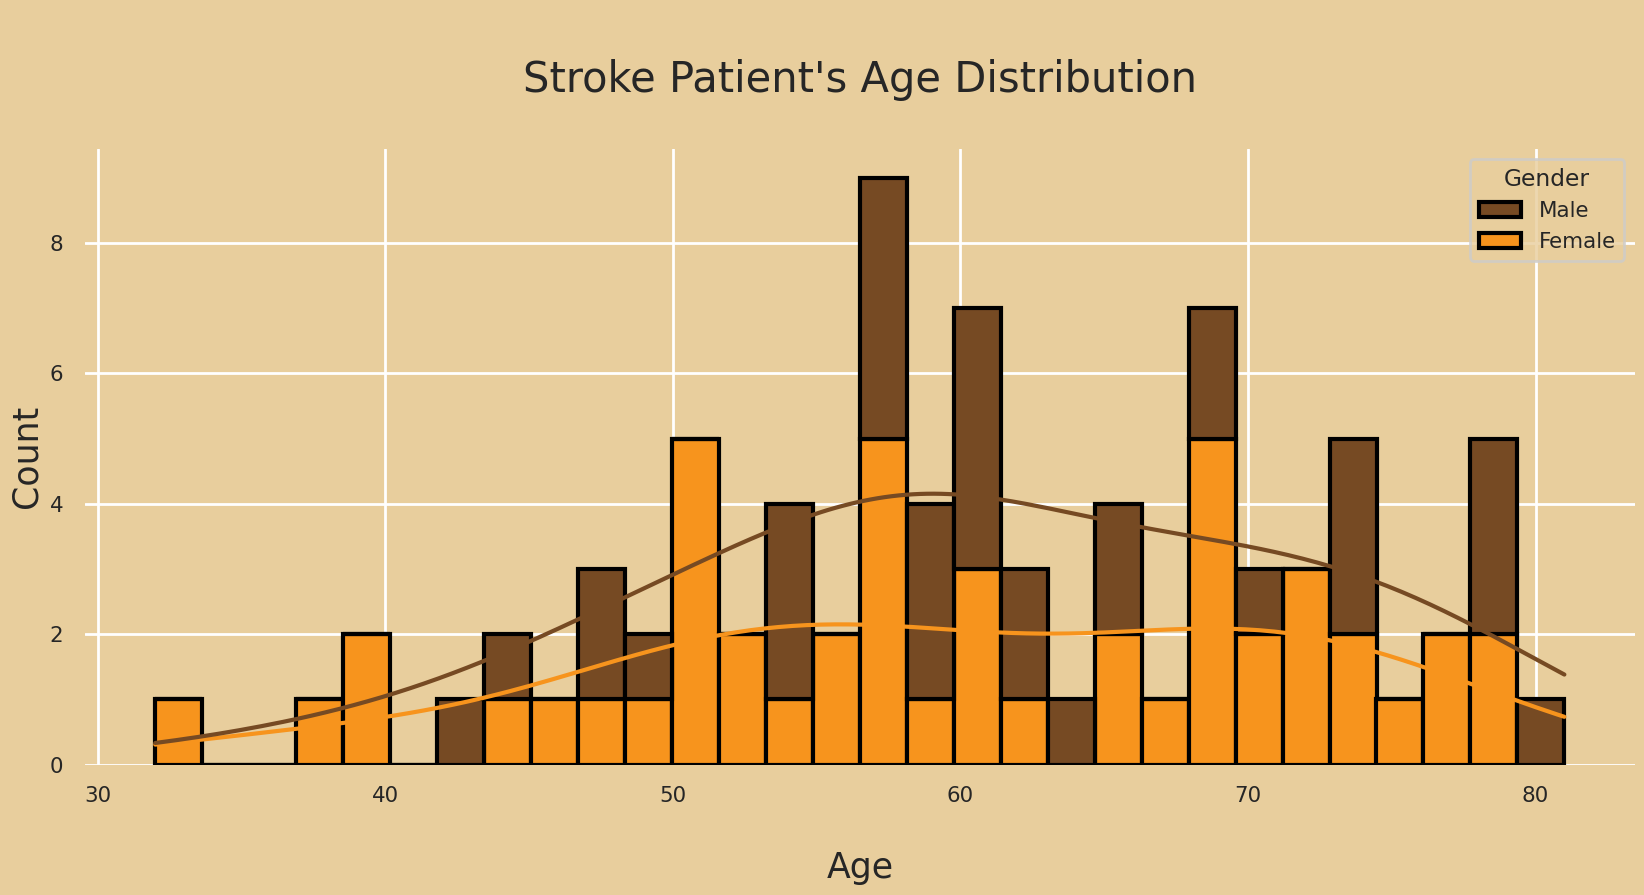

In [ ]:
#Stroke Patient's Age Distributiom
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=data[data["Stroke"] == "Yes"],x="Age",hue="Gender",multiple="stack",palette=palette[0:2],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color(palette[1])
p.axes.lines[1].set_color(palette[0])
p.axes.set_title("\nStroke Patient's Age Distribution\n",fontsize=30)
p.set_ylabel("Count",fontsize=25)
p.set_xlabel("\nAge",fontsize=25)
p.set_yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

Let's have a look on the stroke patient's gender :


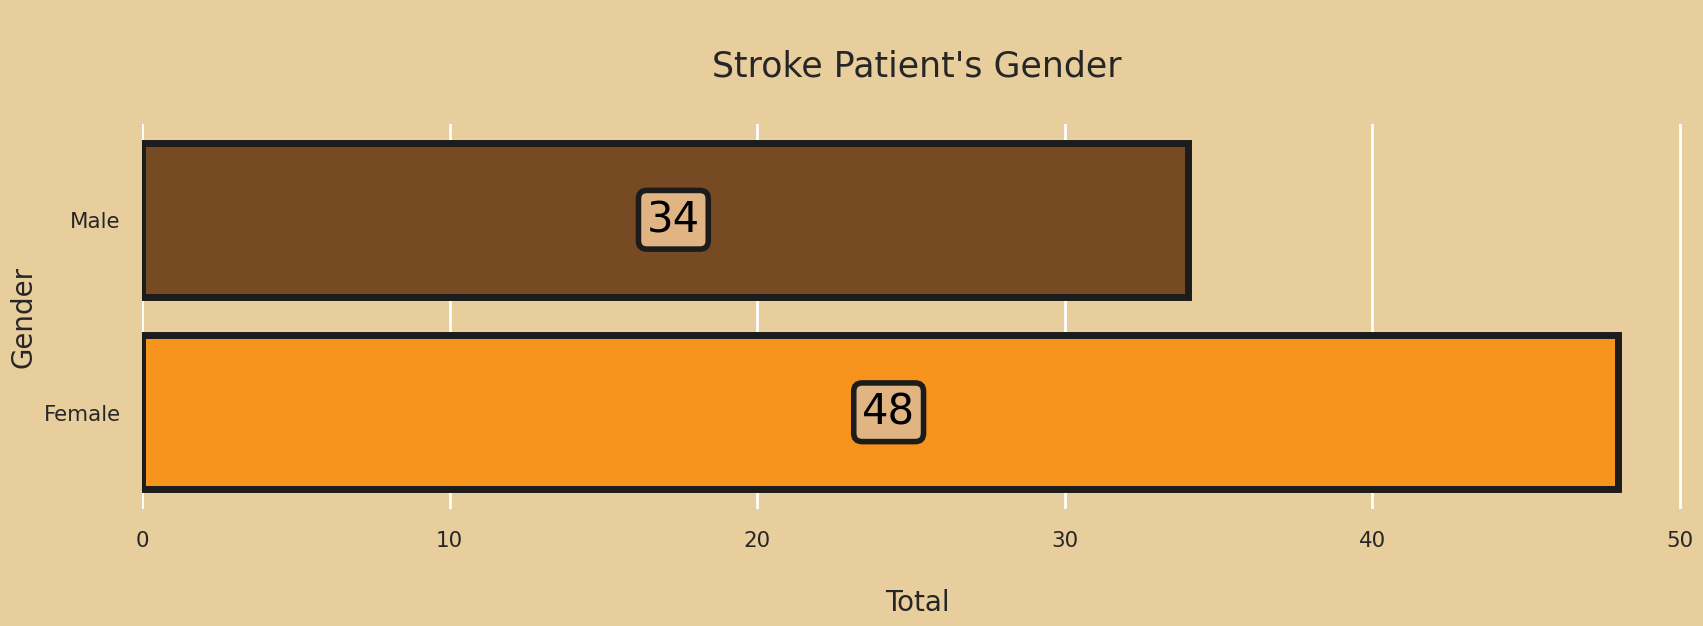

In [ ]:
print("Let's have a look on the stroke patient's gender :")
plt.subplots(figsize=(20, 5))
p=sns.countplot(y=data[data["Stroke"]=="Yes"]["Gender"],order=data[data["Stroke"]=="Yes"]["Gender"].value_counts(ascending=True).index,palette=palette[0:2], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nStroke Patient's Gender\n",fontsize=25)
p.axes.set_ylabel("Gender",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the stroke patient's smoking status :


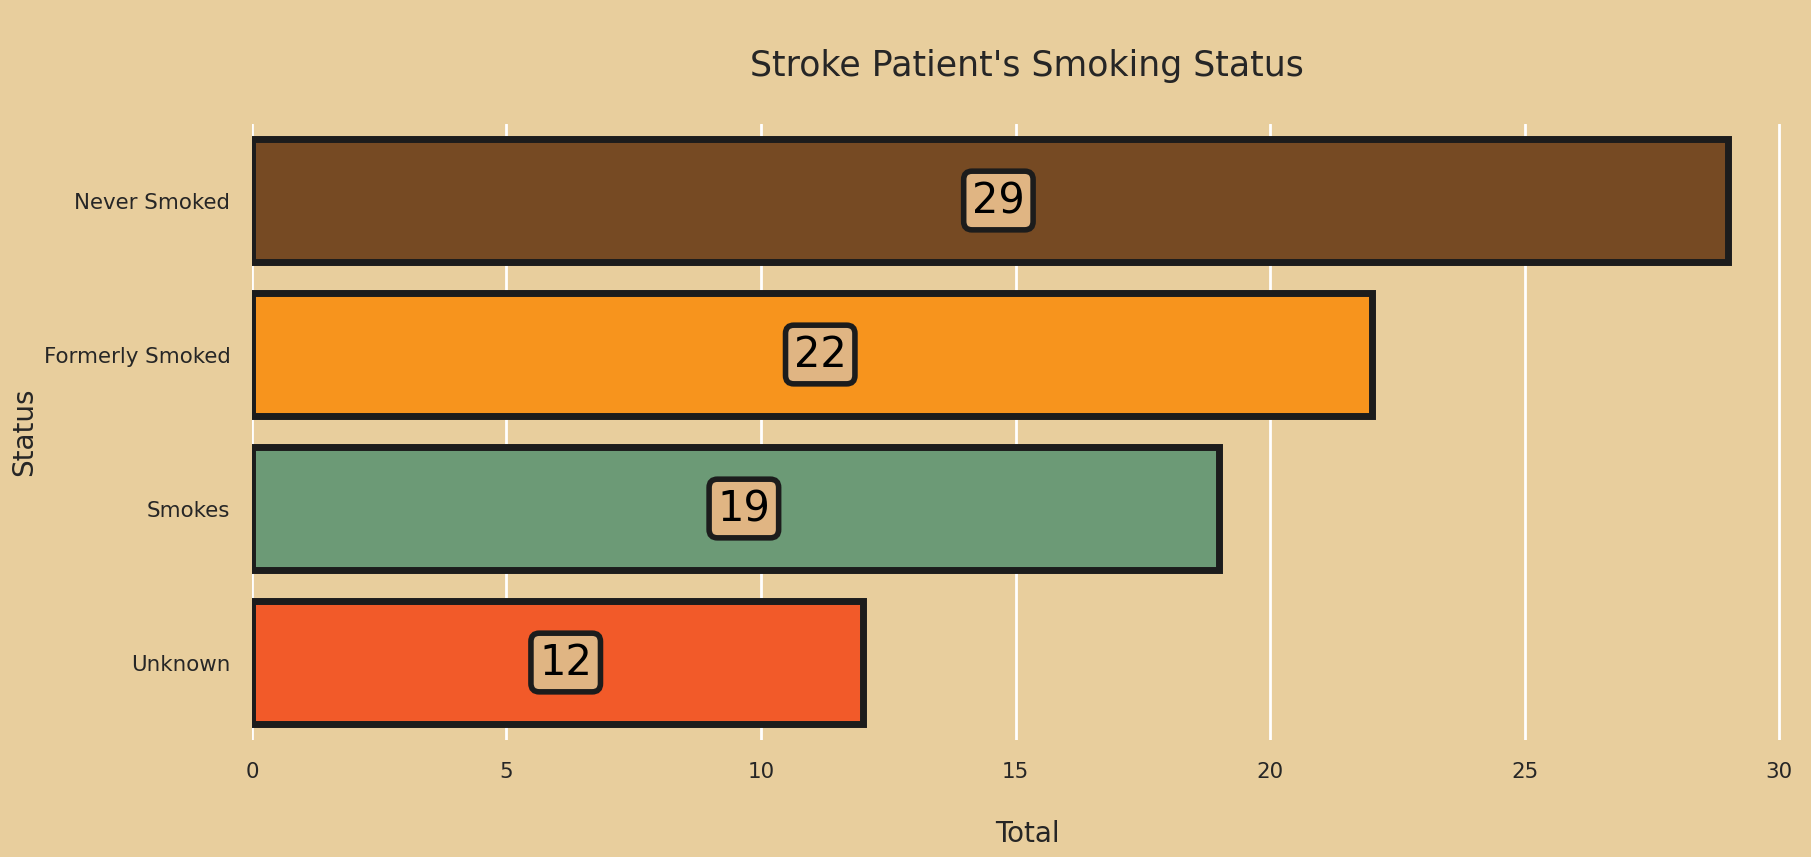

In [ ]:
print("Let's have a look on the stroke patient's smoking status :")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=data[data["Stroke"]=="Yes"]["Smoking Status"],order=data[data["Stroke"]=="Yes"]["Smoking Status"].value_counts(ascending=False).index,palette=palette[0:4], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nStroke Patient's Smoking Status\n",fontsize=25)
p.axes.set_ylabel("Status",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the stroke patient's marital status :


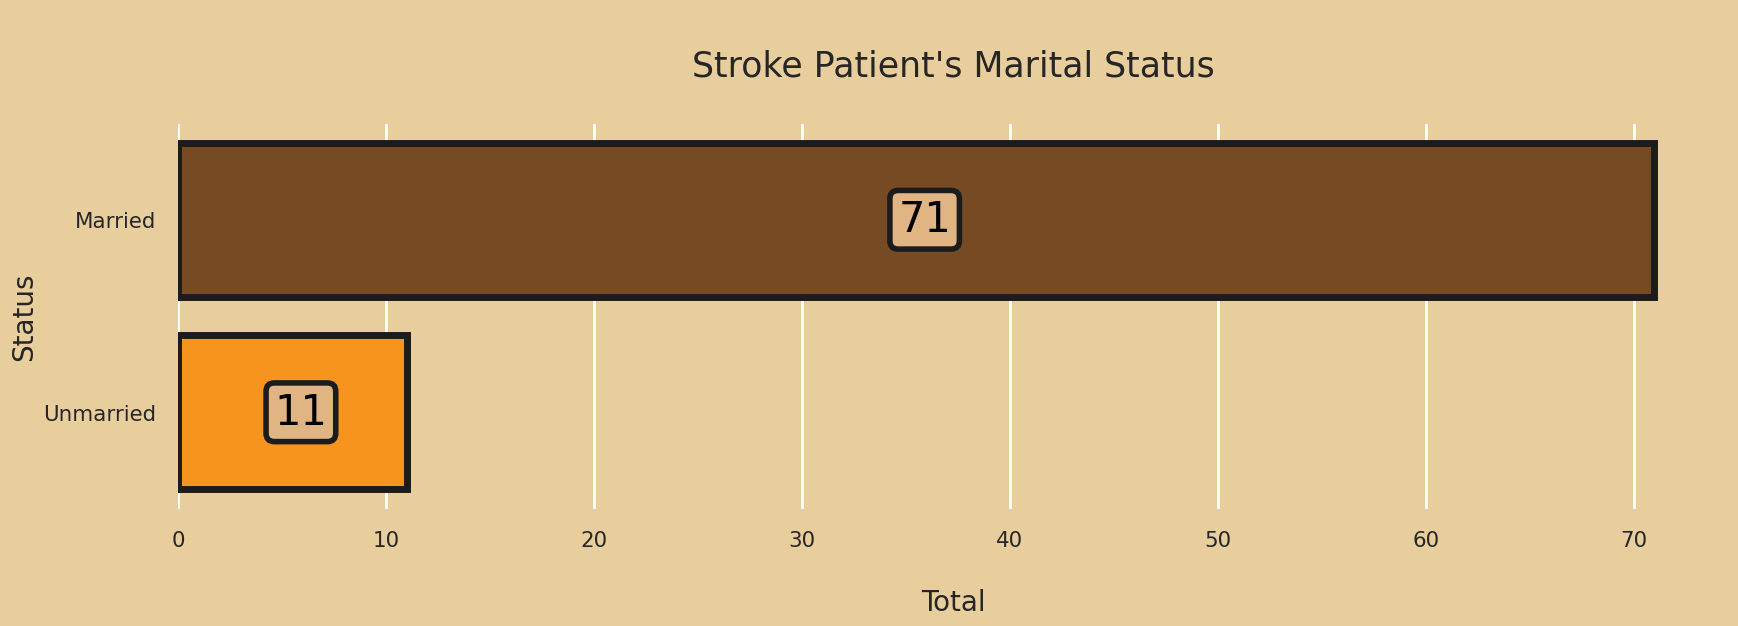

In [ ]:
print("Let's have a look on the stroke patient's marital status :")
plt.subplots(figsize=(20, 5))
p=sns.countplot(y=data[data["Stroke"]=="Yes"]["Marital Status"],order=data[data["Stroke"]=="Yes"]["Marital Status"].value_counts(ascending=False).index,palette=palette[0:2], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nStroke Patient's Marital Status\n",fontsize=25)
p.axes.set_ylabel("Status",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the distribution of stroke patient's BMI :


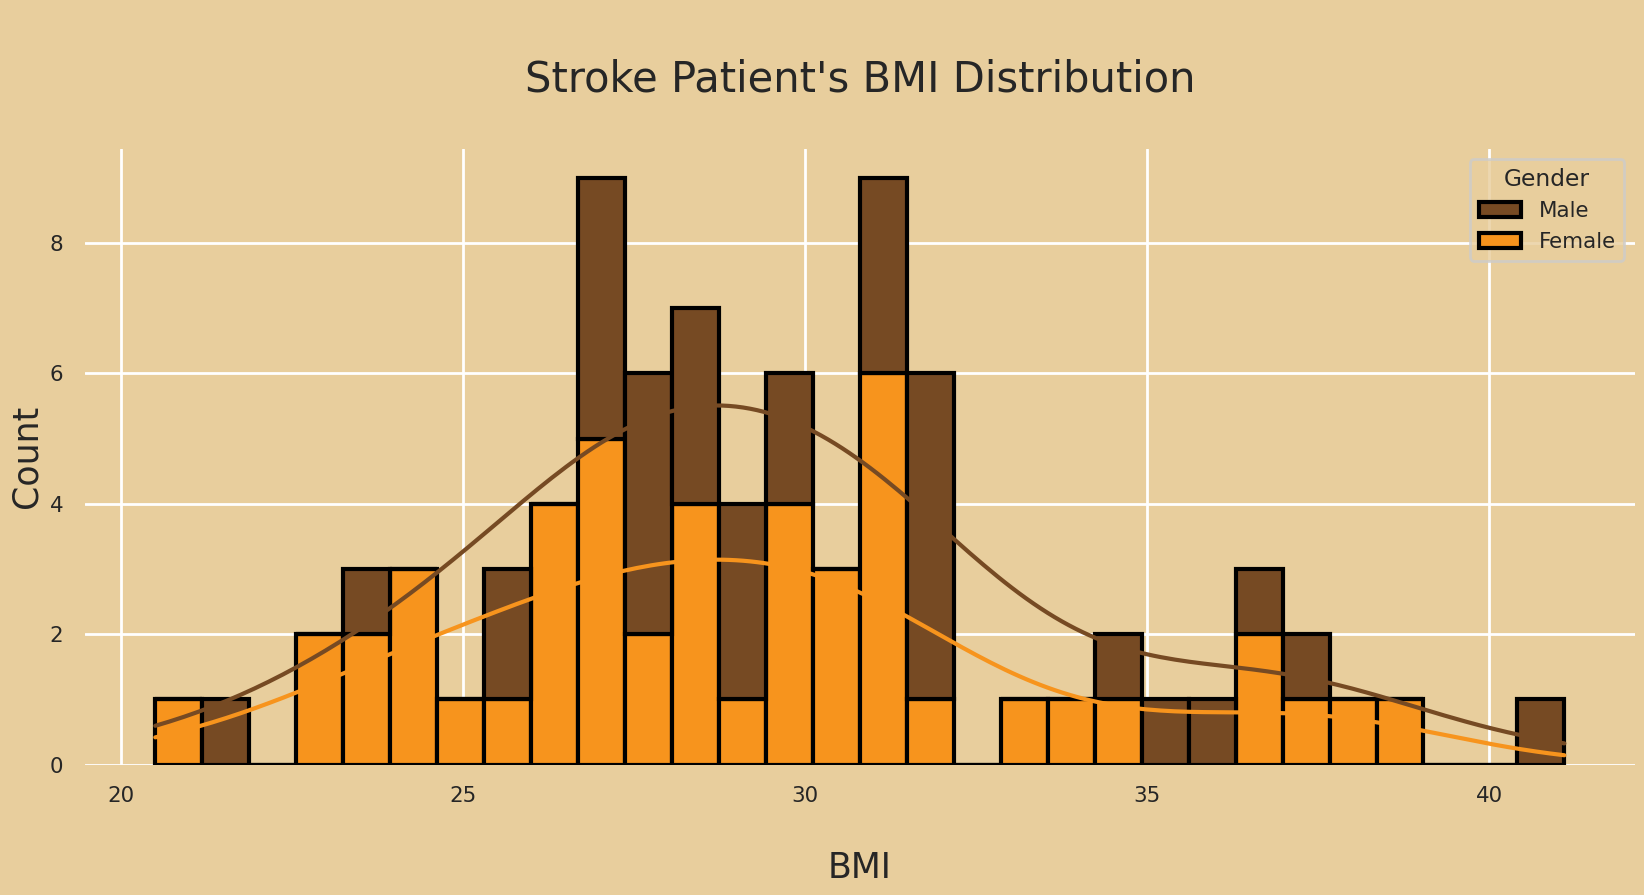

In [ ]:
#Stroke Patient's BMI
print(f"Let's have a look on the distribution of stroke patient's BMI :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=data[data["Stroke"] == "Yes"],x="BMI",hue="Gender",multiple="stack",palette=palette[0:2],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color(palette[1])
p.axes.lines[1].set_color(palette[0])
p.axes.set_title("\nStroke Patient's BMI Distribution\n",fontsize=30)
p.set_ylabel("Count",fontsize=25)
p.set_xlabel("\nBMI",fontsize=25)
p.set_yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

Let's have a look on the stroke patient's heart disease :


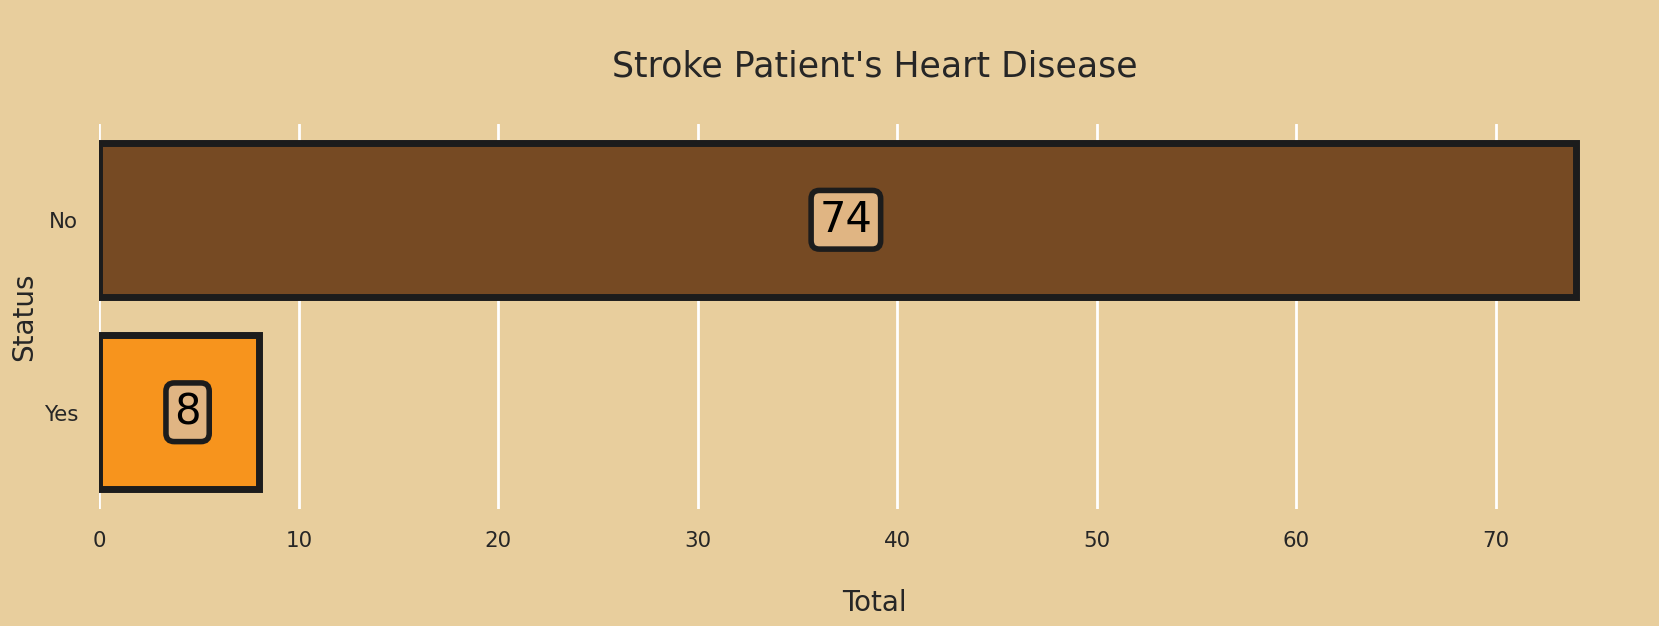

In [ ]:
print("Let's have a look on the stroke patient's heart disease :")
plt.subplots(figsize=(20, 5))
p=sns.countplot(y=data[data["Stroke"]=="Yes"]["Heart Disease"],order=data[data["Stroke"]=="Yes"]["Heart Disease"].value_counts(ascending=False).index,palette=palette[0:2], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nStroke Patient's Heart Disease\n",fontsize=25)
p.axes.set_ylabel("Status",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the stroke patient's hypertension status :


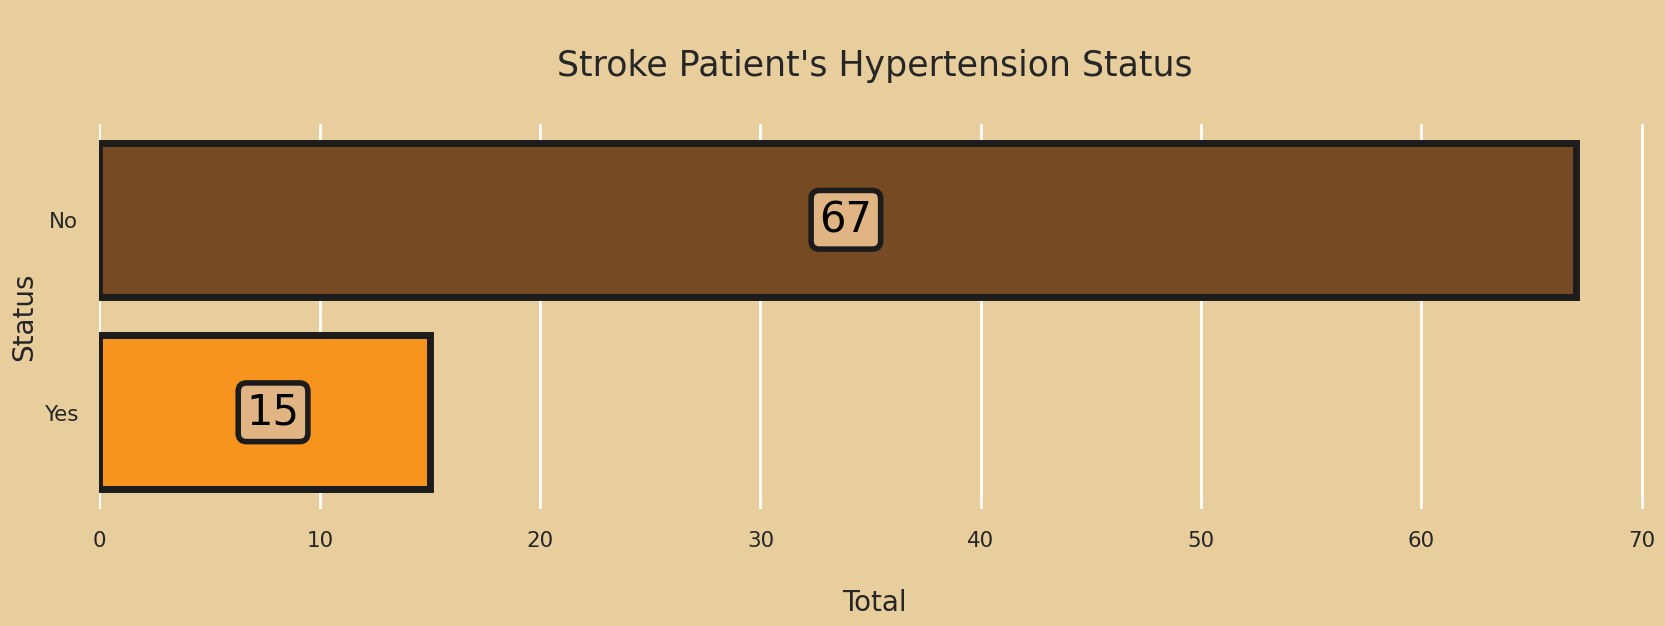

In [ ]:
print("Let's have a look on the stroke patient's hypertension status :")
plt.subplots(figsize=(20, 5))
p=sns.countplot(y=data[data["Stroke"]=="Yes"]["Hypertension"],order=data[data["Stroke"]=="Yes"]["Hypertension"].value_counts(ascending=False).index,palette=palette[0:2], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nStroke Patient's Hypertension Status\n",fontsize=25)
p.axes.set_ylabel("Status",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the distribution of stroke patient's average glucose level :


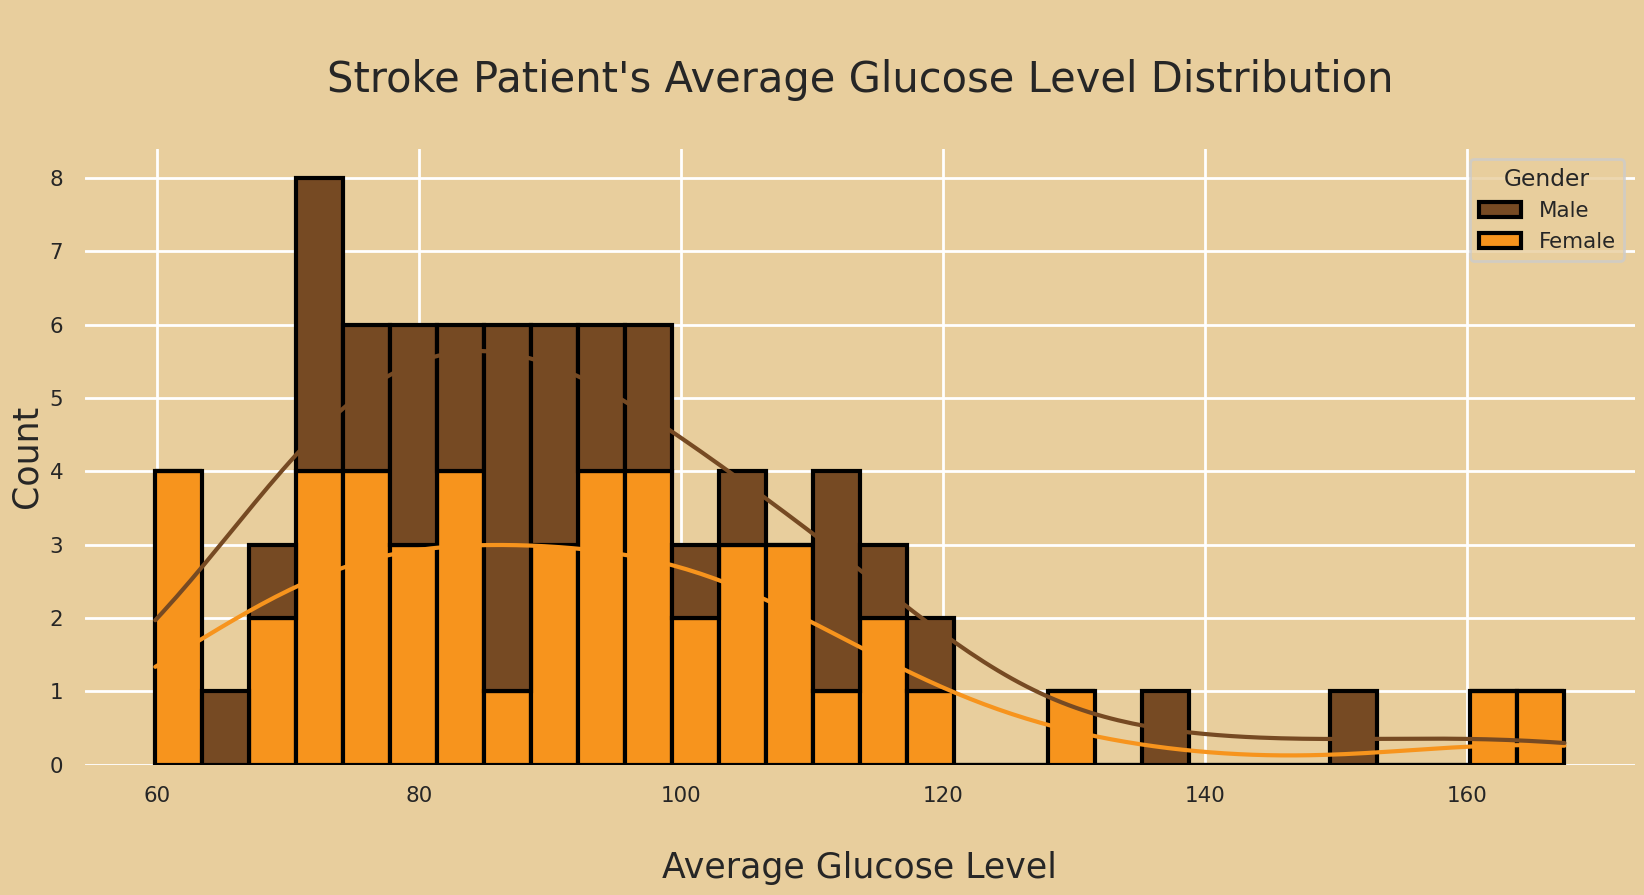

In [ ]:
#Stroke Patient's Average Glucose Leel
print(f"Let's have a look on the distribution of stroke patient's average glucose level :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=data[data["Stroke"]=="Yes"],x="Average Glucose Level",hue="Gender",multiple="stack",palette=palette[0:2],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color(palette[1])
p.axes.lines[1].set_color(palette[0])
p.axes.set_title("\nStroke Patient's Average Glucose Level Distribution\n",fontsize=30)
p.set_ylabel("Count",fontsize=25)
p.set_xlabel("\nAverage Glucose Level",fontsize=25)
p.set_yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

Let's have a look on the stroke patient's occupation type :


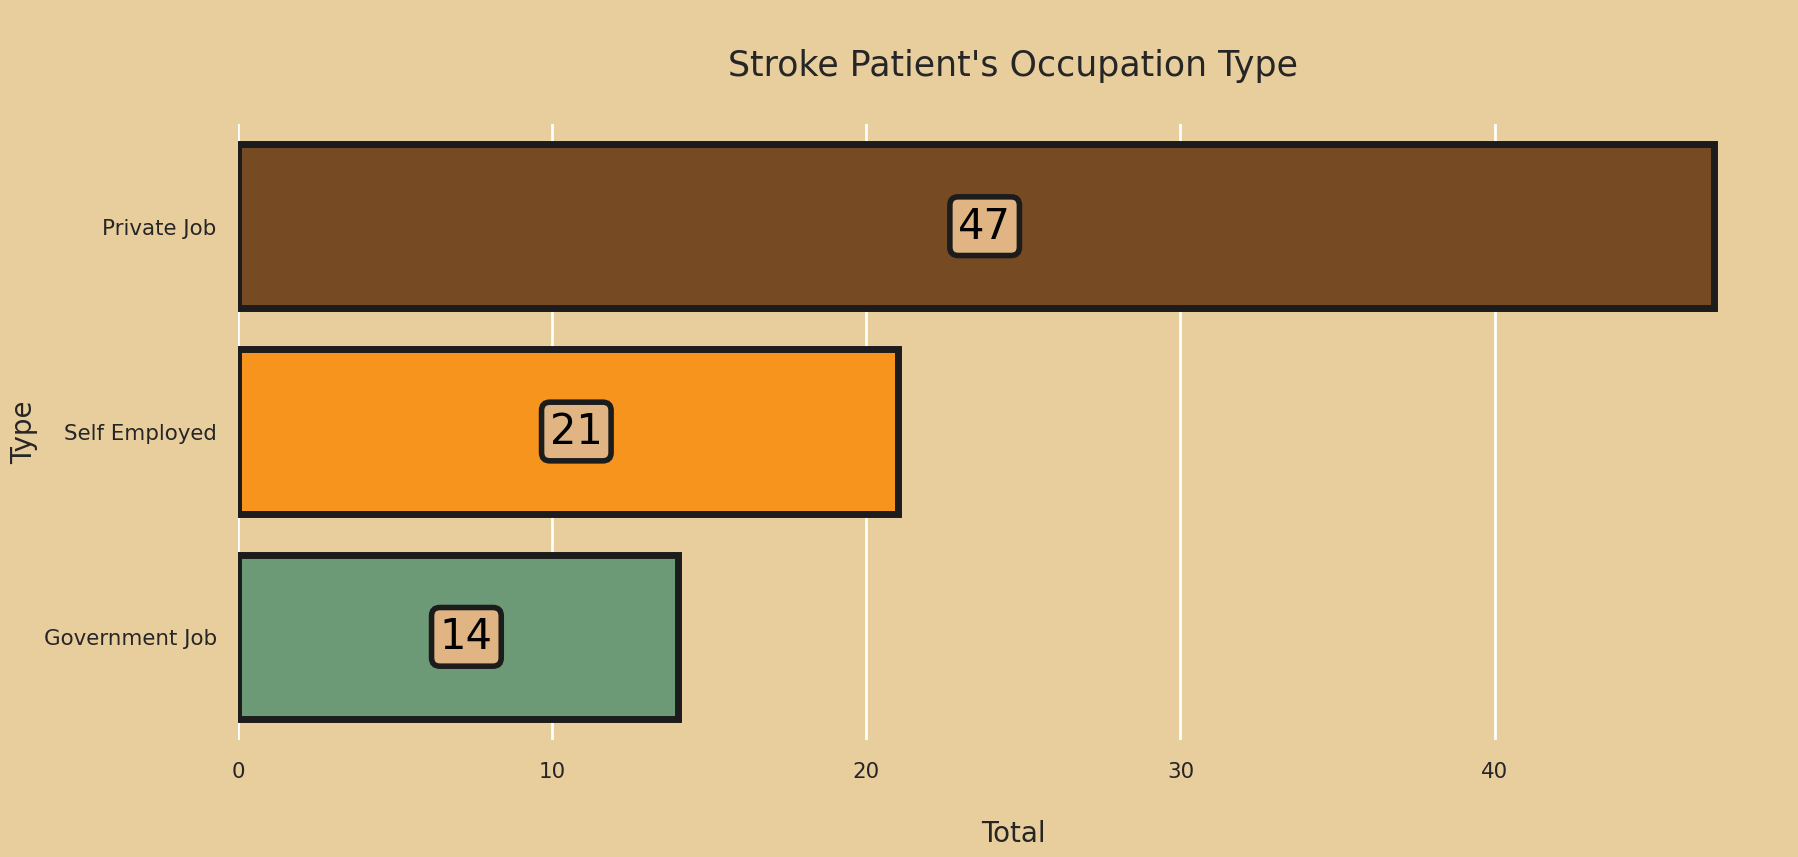

In [ ]:
print("Let's have a look on the stroke patient's occupation type :")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=data[data["Stroke"]=="Yes"]["Occupation Type"],order=data[data["Stroke"]=="Yes"]["Occupation Type"].value_counts(ascending=False).index,palette=palette[0:4], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nStroke Patient's Occupation Type\n",fontsize=25)
p.axes.set_ylabel("Type",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the stroke patient's residence type :


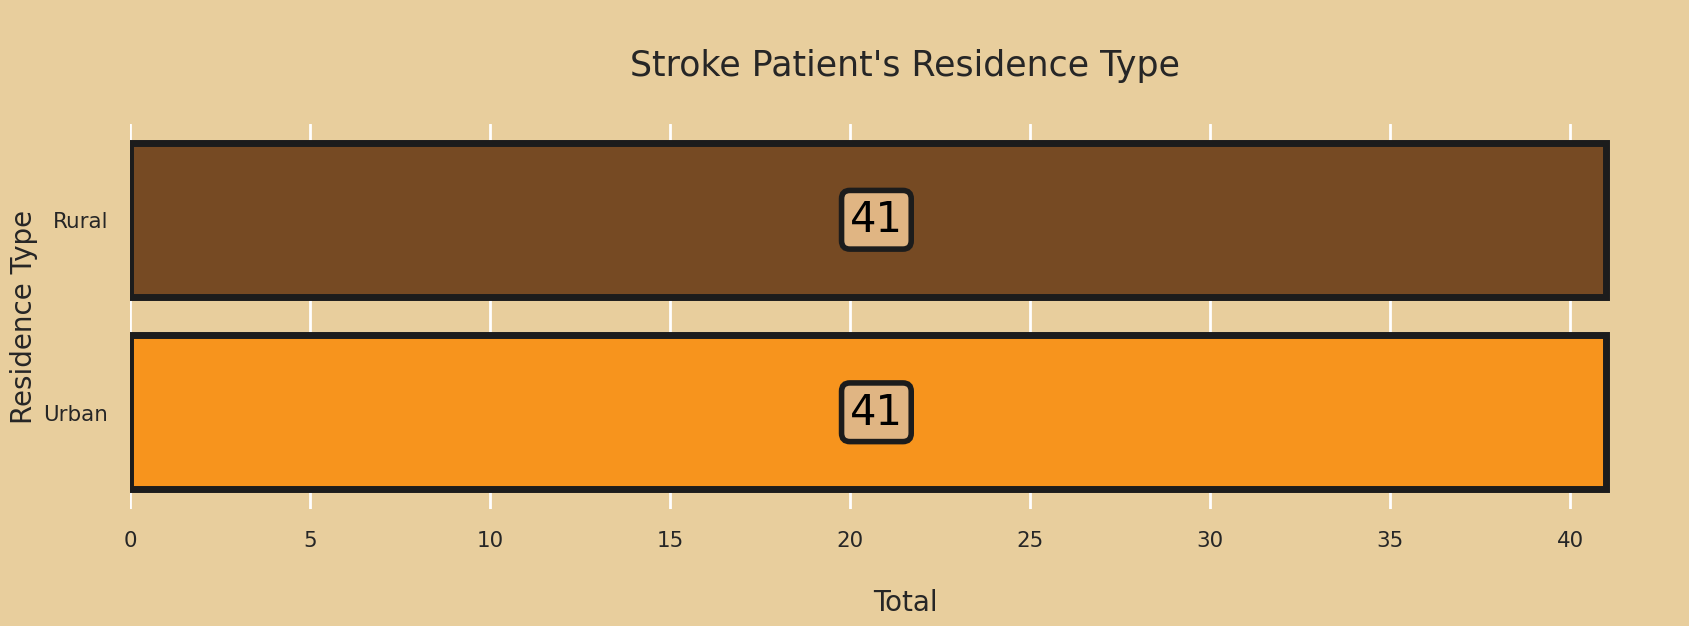

In [ ]:
print("Let's have a look on the stroke patient's residence type :")
plt.subplots(figsize=(20, 5))
p=sns.countplot(y=data[data["Stroke"]=="Yes"]["Residence Type"],order=data[data["Stroke"]=="Yes"]["Residence Type"].value_counts(ascending=False).index,palette=palette[0:2], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nStroke Patient's Residence Type\n",fontsize=25)
p.axes.set_ylabel("Residence Type",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

## MODEL

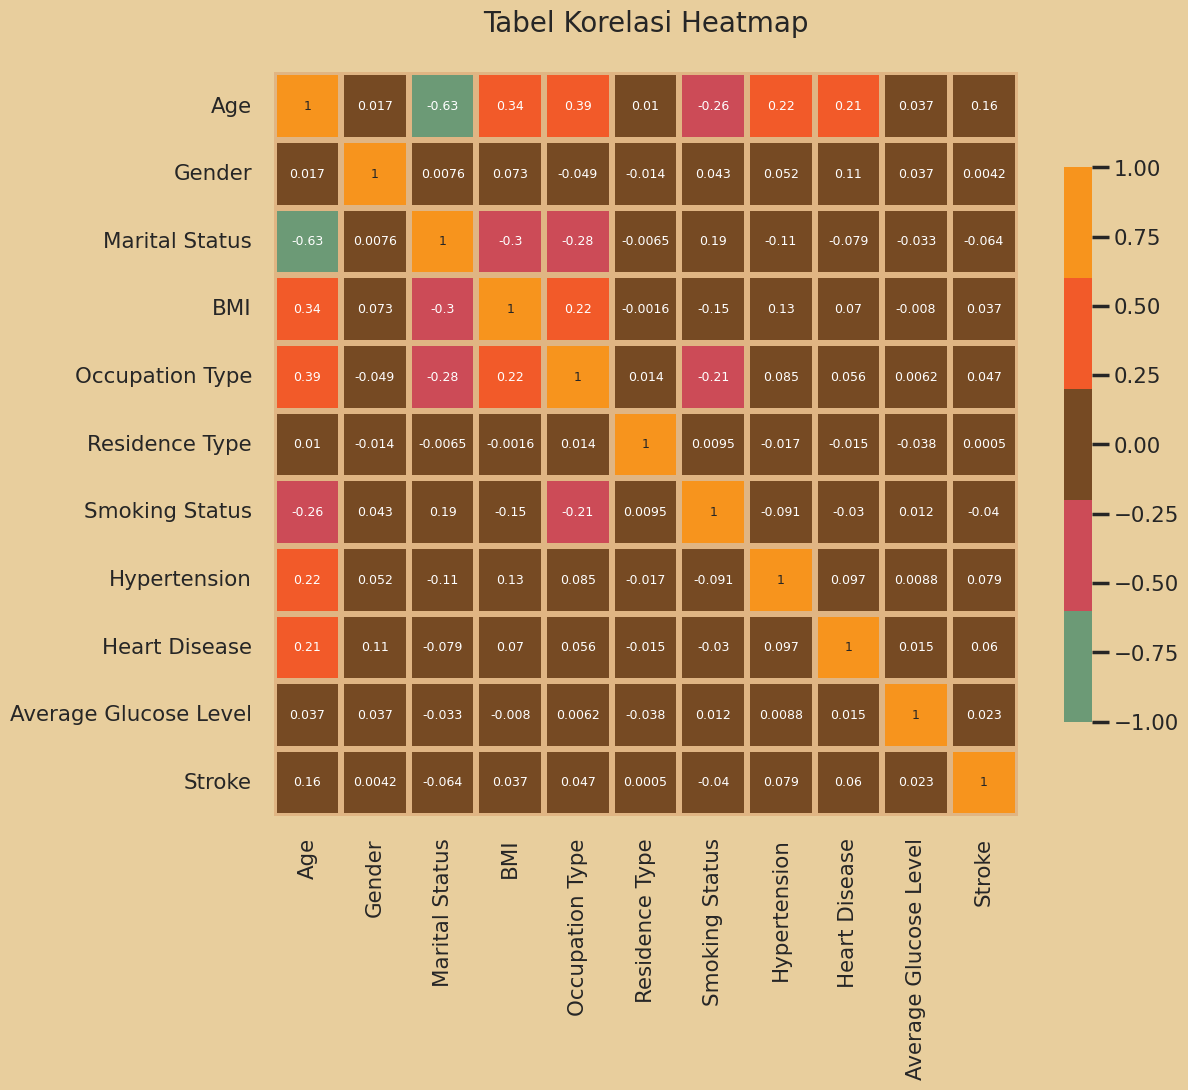

In [ ]:
catcol = [col for col in data.columns if data[col].dtype == "object"]
le = LabelEncoder()
for col in catcol:
        data[col] = le.fit_transform(data[col])


plt.subplots(figsize =(12, 12))

sns.heatmap(data.corr(), cmap = palette_cmap, square=True, cbar_kws=dict(shrink =.6),
            annot=True, vmin=-1, vmax=1, linewidths=3,linecolor='#e0b583',annot_kws=dict(fontsize =9))
plt.title("Tabel Korelasi Heatmap\n", fontsize=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=4)
x = data.drop(["Stroke"],axis =1)
y = data["Stroke"]

sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())
print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (5042, 10), (5042,)
Shape of testing data : (646, 10), (646,)


In [ ]:
# Membuat model menggunakan metode Logistic Regression
lr = LogisticRegression()

# Hyperparameter yang akan dievaluasi untuk Logistic Regression
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
params = {'penalty':['l1','l2','elasticnet'],
          'solver':['newton-cg','lbfgs','liblinear','sag'],
          'C':[0.01,0.1,1.0,10,100]}

grid_search = GridSearchCV(lr, params, cv = kfold)
grid_search.fit(x_train,y_train)

model_lr = grid_search.best_estimator_
model_lr.fit(x_train,y_train)

grid_search.best_params_, grid_search.cv_results_['mean_test_score'].max()

({'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}, nan)

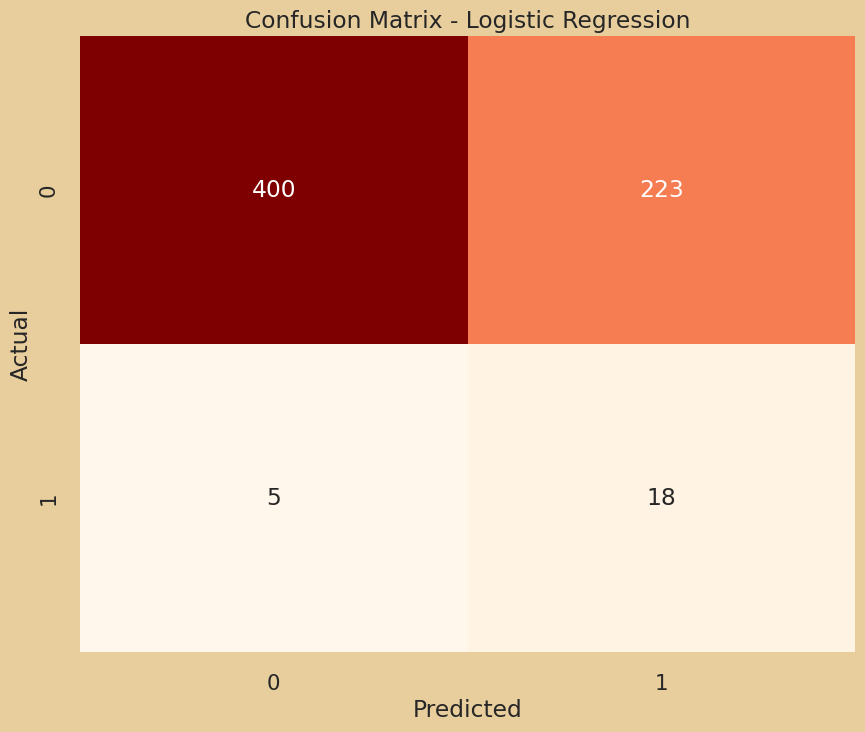


Classification Report : 

              precision    recall  f1-score   support

           0       0.99      0.64      0.78       623
           1       0.07      0.78      0.14        23

    accuracy                           0.65       646
   macro avg       0.53      0.71      0.46       646
weighted avg       0.96      0.65      0.76       646


The Accuracy of Logistic Regression is 64.71 %


In [ ]:
lr_pred = model_lr.predict(x_test)
lr_conf = confusion_matrix(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
lr_acc = round(accuracy_score(y_test, lr_pred)*100, ndigits = 2)

# Menunjukkan confusion matrix sebagai heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(lr_conf, annot=True, fmt='d', cmap='OrRd', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Memperlihatkan nilai akurasi dari metode Logistic Regression
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regression is {lr_acc} %")

In [ ]:
# Membuat model menggunakan metode KNN
knn = KNeighborsClassifier()

# Hyperparameter yang akan dievaluasi untuk KNN
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
grid_params = {'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

grid_search = GridSearchCV(knn, grid_params, cv = kfold,
                           verbose = 1, n_jobs = -1)
grid_search.fit(x_train,y_train)

model_knn = grid_search.best_estimator_
model_knn.fit(x_train,y_train)

grid_search.best_params_, grid_search.cv_results_['mean_test_score'].max()

Fitting 5 folds for each of 36 candidates, totalling 180 fits


({'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'},
 0.9520043812040839)

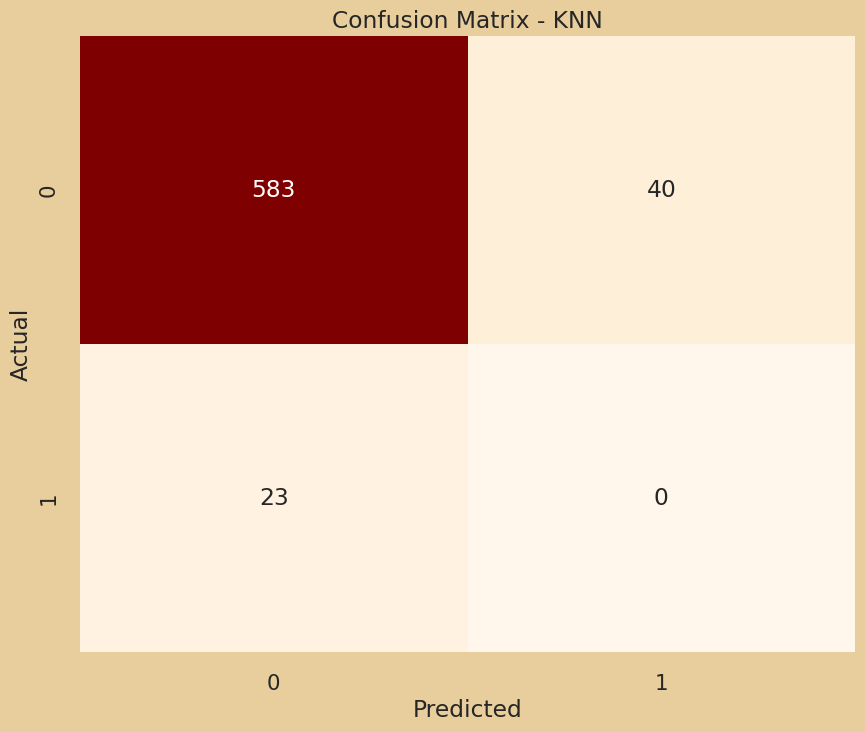


Classification Report : 

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       623
           1       0.00      0.00      0.00        23

    accuracy                           0.90       646
   macro avg       0.48      0.47      0.47       646
weighted avg       0.93      0.90      0.91       646


The Accuracy of K Nearest Neighbors Classifier is 90.25 %


In [ ]:
knn_pred = model_knn.predict(x_test)
knn_conf = confusion_matrix(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred)
knn_acc = round(accuracy_score(y_test, knn_pred)*100, ndigits = 2)

# Menunjukkan confusion matrix sebagai heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(knn_conf, annot=True, fmt='d', cmap='OrRd', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

# Memperlihatkan nilai akurasi dari metode KNN
print(f"\nClassification Report : \n\n{knn_report}")
print(f"\nThe Accuracy of K Nearest Neighbors Classifier is {knn_acc} %")

In [ ]:
# Membuat model menggunakan metode Support Vector Machine
svm = SVC()

# Hyperparameter yang akan dievaluasi untuk SVC
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
params = {'C':[0.01,0.1,0.5,1,5,10,50,100],'kernel':['poly','rbf']}

grid_search = GridSearchCV(svm, params, cv = kfold, scoring='f1')
grid_search.fit(x_train,y_train)

model_svm = grid_search.best_estimator_
model_svm.fit(x_train,y_train)

grid_search.best_params_, grid_search.cv_results_['mean_test_score'].max()

({'C': 100, 'kernel': 'rbf'}, 0.9670236995297239)

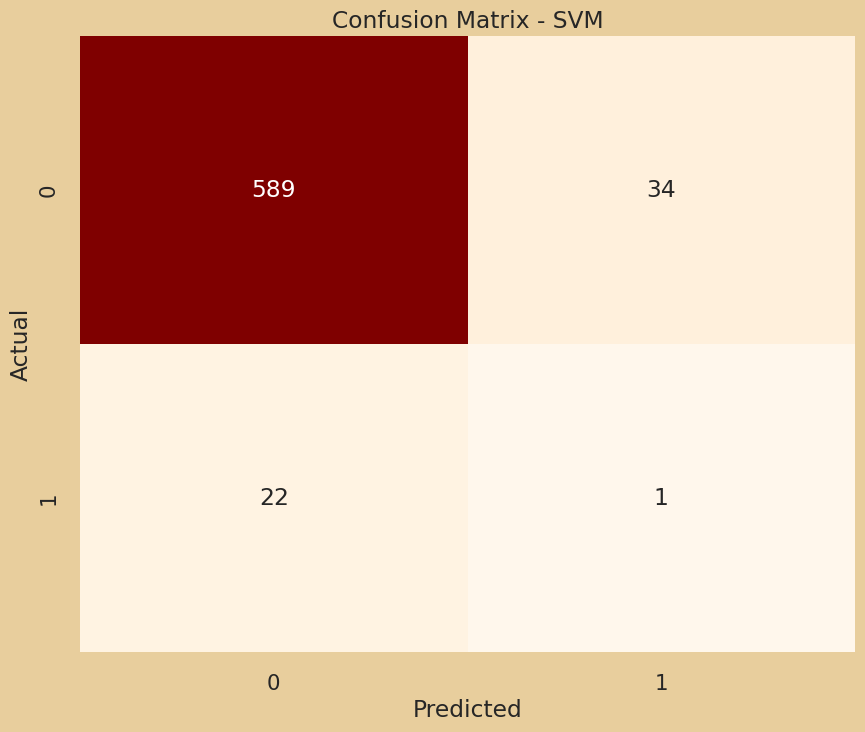


Classification Report : 

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       623
           1       0.03      0.04      0.03        23

    accuracy                           0.91       646
   macro avg       0.50      0.49      0.49       646
weighted avg       0.93      0.91      0.92       646


The Accuracy of Support Vector Machine is 91.33 %


In [ ]:
svm_pred = model_svm.predict(x_test)
svm_conf = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_acc = round(accuracy_score(y_test, svm_pred)*100, ndigits = 2)

plt.figure(figsize=(10, 8))
sns.heatmap(svm_conf, annot=True, fmt='d', cmap='OrRd', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

# Memperlihatkan nilai akurasi dari metode Support Vector Machine
print(f"\nClassification Report : \n\n{svm_report}")
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc} %")

In [ ]:
# Membuat model menggunakan metode Random Forest Classifier
rfg = RandomForestClassifier()

# Hyperparameter yang akan dievaluasi untuk RFC
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
params = {'n_estimators': [5,50,100], 'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 120, num = 12)]}

grid_search = GridSearchCV(rfg, params, cv = kfold, verbose = 2, n_jobs=-1 )
grid_search.fit(x_train,y_train)

model_rfg = grid_search.best_estimator_
model_rfg.fit(x_train,y_train)

grid_search.best_params_, grid_search.cv_results_['mean_test_score'].max()

Fitting 5 folds for each of 72 candidates, totalling 360 fits


({'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 100},
 0.9867138216370129)

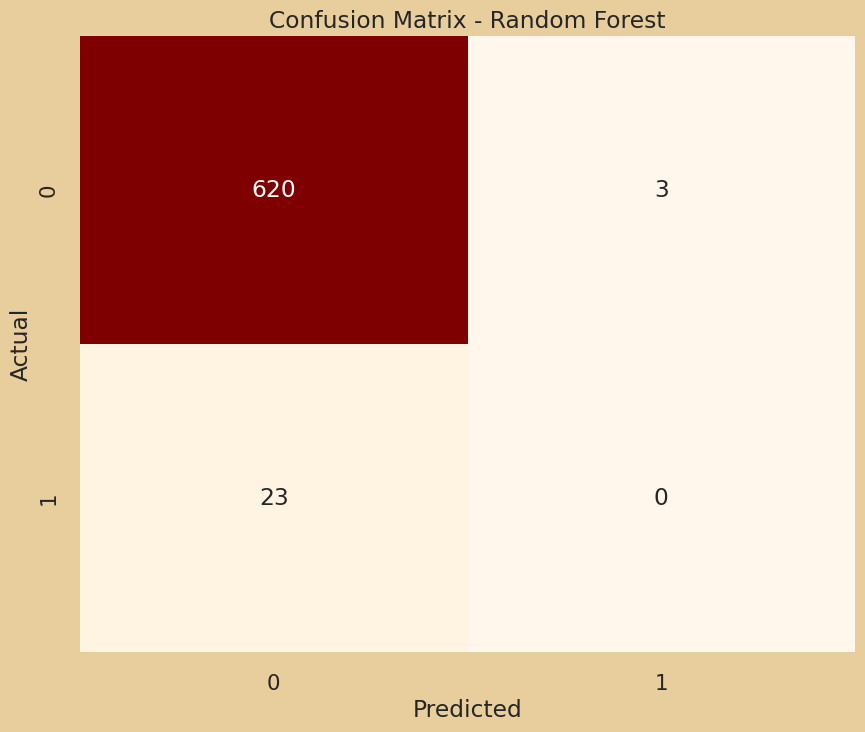


Classification Report : 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       623
           1       0.00      0.00      0.00        23

    accuracy                           0.96       646
   macro avg       0.48      0.50      0.49       646
weighted avg       0.93      0.96      0.94       646


The Accuracy of Random Forest Classifier is 95.98 %


In [ ]:
# Membuat model menggunakan metode Random Forest Classifier
rfg_pred = model_rfg.predict(x_test)
rfg_conf = confusion_matrix(y_test, rfg_pred)
rfg_report = classification_report(y_test, rfg_pred)
rfg_acc = round(accuracy_score(y_test, rfg_pred)*100, ndigits = 2)

# Menunjukkan confusion matrix sebagai heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(rfg_conf, annot=True, fmt='d', cmap='OrRd', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Memperlihatkan nilai akurasi dari metode Random Forest Classifier
print(f"\nClassification Report : \n\n{rfg_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rfg_acc} %")

## NEURAL NETWORK

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

# Proses penyusunan model neural network
regularization_parameter = 0.003
neural_model = Sequential([tf.keras.layers.Dense(units=32, input_dim=(x_train.shape[-1]), activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dense(units=64, activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dense(units=128, activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dropout(0.3),
                    tf.keras.layers.Dense(units=16,activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dense(units=1, activation="sigmoid")
                    ])
print(neural_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 16)                2064      
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,865
Trainable params: 12,865
Non-traina

In [ ]:
  class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("accuracy") == 1.0):
            print("\nAccuracy is 100% so canceling training!")
            self.model.stop_training = True

callbacks = myCallback()

neural_model.compile(optimizer = Adam(learning_rate = 0.001),
                     loss = "binary_crossentropy", metrics = ["accuracy"])

history = neural_model.fit(x_train, y_train, epochs = 150, verbose = 1,
                           batch_size = 64, validation_data = (x_test, y_test),
                           callbacks = [callbacks])

Epoch 1/150
79/79 [==============================] - 3s 16ms/step - loss: 3.2717 - accuracy: 0.6912 - val_loss: 2.3445 - val_accuracy: 0.6455
Epoch 2/150
79/79 [==============================] - 0s 4ms/step - loss: 1.6123 - accuracy: 0.7767 - val_loss: 1.1514 - val_accuracy: 0.7028
Epoch 3/150
79/79 [==============================] - 0s 4ms/step - loss: 0.9148 - accuracy: 0.8074 - val_loss: 0.8057 - val_accuracy: 0.7337
Epoch 4/150
79/79 [==============================] - 0s 4ms/step - loss: 0.7168 - accuracy: 0.8251 - val_loss: 0.6987 - val_accuracy: 0.7523
Epoch 5/150
79/79 [==============================] - 0s 4ms/step - loss: 0.6397 - accuracy: 0.8413 - val_loss: 0.6919 - val_accuracy: 0.7446
Epoch 6/150
79/79 [==============================] - 0s 4ms/step - loss: 0.5895 - accuracy: 0.8582 - val_loss: 0.6607 - val_accuracy: 0.7492
Epoch 7/150
79/79 [==============================] - 0s 5ms/step - loss: 0.5546 - accuracy: 0.8669 - val_loss: 0.6651 - val_accuracy: 0.7399
Epoch 8/150


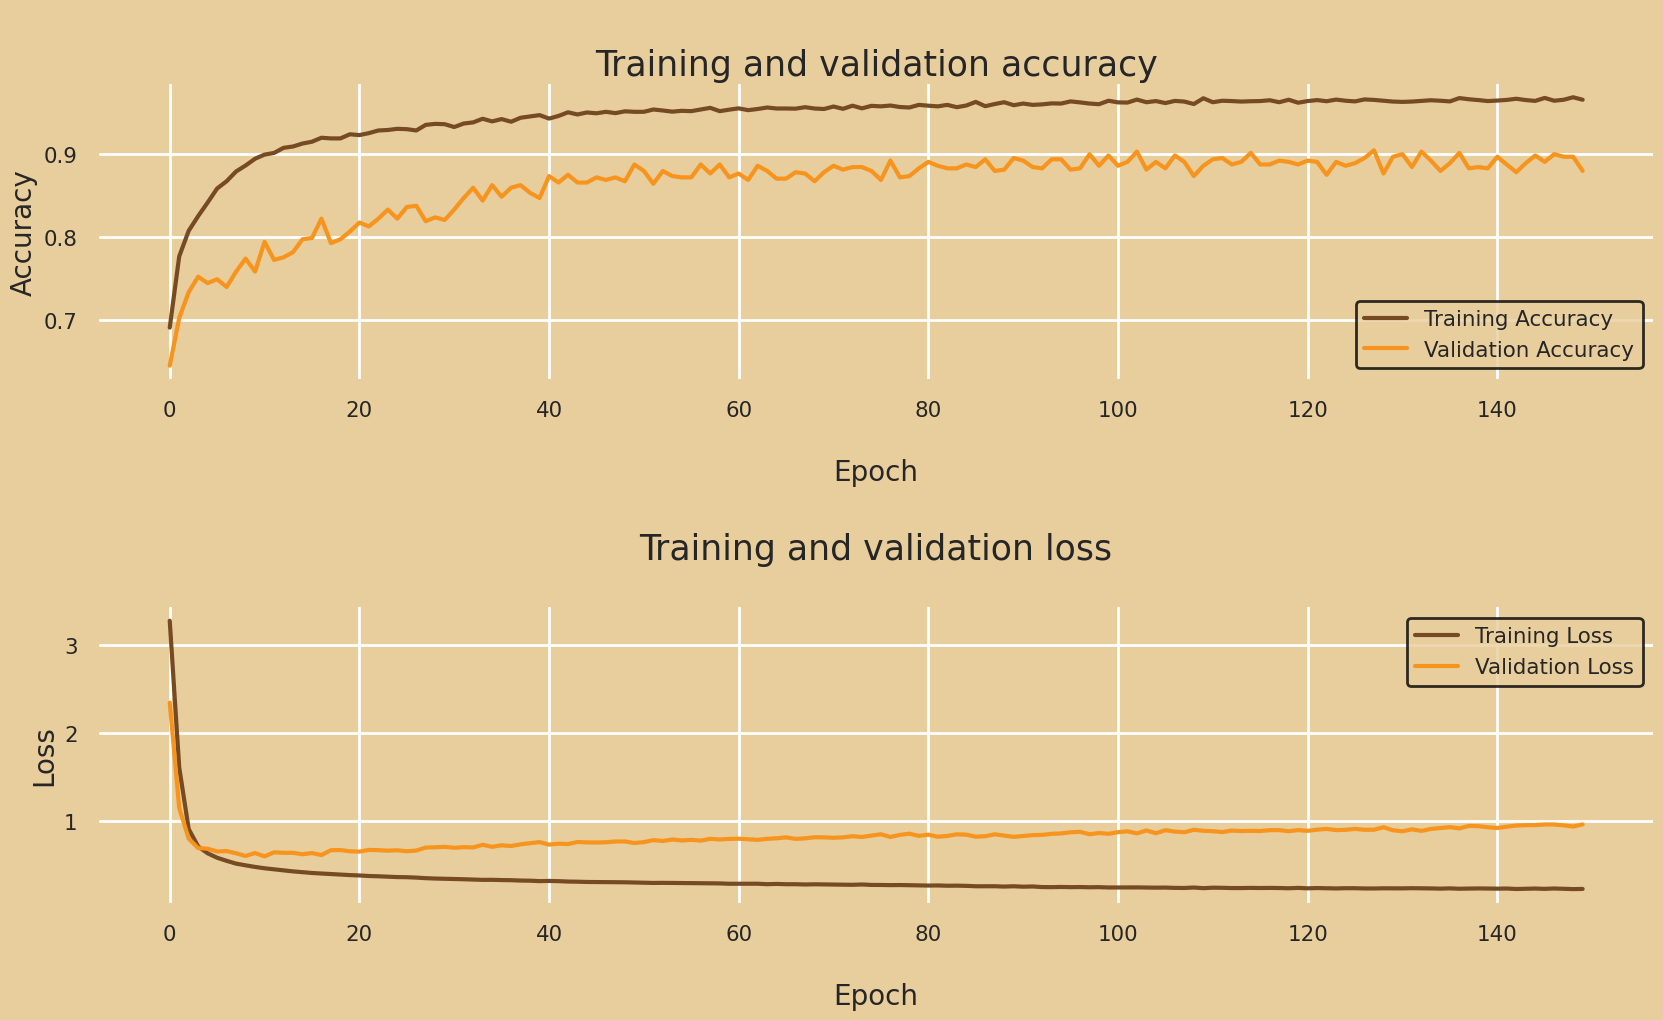

In [ ]:
# Akan ditunjukkan nilai akurasi dari model Neural Network yang dibuat
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.figure(figsize=(20, 12))
plt.subplot(2,1,1)
plt.tight_layout(pad=8.0)

plt.plot(epochs, acc, palette[0], label= "Training Accuracy")
plt.plot(epochs, val_acc, palette[1], label= "Validation Accuracy")
plt.yscale("linear")
plt.title("\nTraining and validation accuracy",fontsize=25)
plt.xlabel("\nEpoch",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.legend(edgecolor="black")

plt.subplot(2,1,2)
plt.plot(epochs, loss, palette[0], label= "Training Loss")
plt.plot(epochs, val_loss, palette[1], label= "Validation Loss")
plt.title("Training and validation loss\n",fontsize=25)
plt.xlabel("\nEpoch",fontsize=20)
plt.ylabel("Loss",fontsize=20)
plt.legend(edgecolor="black")

sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
# Memprediksi label kelas menggunakan model yang telah dilatih
y_pred_prob = neural_model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Menghitung confusion matrix
nn_conf = confusion_matrix(y_test, y_pred)

# Menghasilkan classification report
nn_report = classification_report(y_test, y_pred)

# Menghitung akurasi
nn_acc = round(accuracy_score(y_test, y_pred) * 100, ndigits=4)

plt.figure(figsize=(10, 8))
sns.heatmap(d_classif_conf, annot=True, fmt='d', cmap='OrRd', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network Model')
plt.show()

# Menampilkan hasil
print("\nClassification Report:\n", d_classif_report)
print("\nThe Accuracy of Neural Network Model is", d_classif_acc, "%")

NameError: ignored

In [ ]:
# Memprediksi label kelas menggunakan model yang telah dilatih
y_pred_prob = neural_model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Menghitung confusion matrix
nn_conf = confusion_matrix(y_test, y_pred)

# Menghasilkan classification report
nn_report = classification_report(y_test, y_pred)

# Menghitung akurasi
nn_acc = round(accuracy_score(y_test, y_pred) * 100, ndigits=2)

plt.figure(figsize=(10, 8))
sns.heatmap(nn_conf, annot=True, fmt='d', cmap='OrRd', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network Model')
plt.show()

# Menampilkan hasil
print("\nClassification Report:\n", nn_report)
print("\nThe Accuracy of Neural Network Model is", nn_acc, "%")